In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [141]:
housing = pd.DataFrame(pd.read_csv("./Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [142]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Define map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to housing list
housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


# Problem 2

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

1. Plot your regression model for SVR similar to the sample code
    provided on Canvas.
2. Compare your results against linear regression with regularization
    loss that you already did in homework1. 
3. Use the PCA feature extraction for your training. Perform N number
    of independent training (N=1, …, K). Identify the optimum number of
    K, principal components that achieve the highest regression
    accuracy. 
4. Explore different kernel tricks to capture non-linearities within
    your data. Plot the results and compare the accuracies for
    different kernels.

In [143]:
# Obtain SVR model and compare performance with linear regression
input_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 
            'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
            'airconditioning', 'parking', 'prefarea']
x = housing[input_vars]
y = housing['price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [144]:
# Training split and feature scaling
standScale = StandardScaler()
# x = standScale.fit_transform(x)
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
# Y_train.head()

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

(436, 11) (109, 11) (436,) (109,)


In [152]:
svr_lin = SVR(kernel='linear', C=1e6)
y_lin = svr_lin.fit(X_train, Y_train).predict(X_test)
svr_poly = SVR(kernel='poly', C=1e6, degree=2)
y_poly = svr_poly.fit(X_train, Y_train).predict(X_test)
svr_rbf = SVR(kernel='rbf', C=1e6, gamma=0.1)
y_rbf = svr_rbf.fit(X_train, Y_train).predict(X_test)

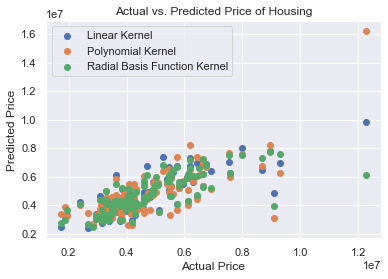

In [151]:
plt.scatter(Y_test, y_lin, label = 'Linear Kernel')
plt.scatter(Y_test, y_poly, label = 'Polynomial Kernel')
plt.scatter(Y_test, y_rbf, label = 'Radial Basis Function Kernel')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Price of Housing")
plt.legend()
plt.show()

In [147]:
# Linear Kernel
Accuracy_lin = []
max_accuracy_lin = 0
max_k_lin = 0

k = range(1,len(input_vars)+1)
for i in k:
    
    pca_final = PCA(n_components=i)
    # df_train_pca = pca_final.fit_transform(X_train)
    # df_test_pca = pca_final.transform(X_test)
    
    principalComponents = pca_final.fit_transform(x)
    principalDF = pd.DataFrame(data = principalComponents)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, y, test_size=0.2, random_state = 0)
    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    svr = SVR(kernel='linear', C=1e6)
    model_SVR = svr.fit(X_train, Y_train)
    Y_pred = model_SVR.predict(X_test) 
    #Accuracy_lin.append(mean_squared_error(Y_test, Y_pred))
    Accuracy_lin.append(r2_score(Y_test, Y_pred))
    #Accuracy_lin.append(model_SVR.score(Y_test, Y_pred))
    if Accuracy_lin[i-1] > max_accuracy_lin:
        max_k_lin = i
        max_accuracy_lin = Accuracy_lin[i-1]
print("The optimal number of principal components:", 
      max_k_lin, "with an accuracy of: ", max_accuracy_lin)

(436, 1) (109, 1) (436,) (109,)
(436, 2) (109, 2) (436,) (109,)
(436, 3) (109, 3) (436,) (109,)
(436, 4) (109, 4) (436,) (109,)
(436, 5) (109, 5) (436,) (109,)
(436, 6) (109, 6) (436,) (109,)
(436, 7) (109, 7) (436,) (109,)
(436, 8) (109, 8) (436,) (109,)
(436, 9) (109, 9) (436,) (109,)
(436, 10) (109, 10) (436,) (109,)
(436, 11) (109, 11) (436,) (109,)
The optimal number of principal components: 8 with an accuracy of:  0.6869222993273993


In [148]:
# Poly Kernel
Accuracy_poly = []
max_accuracy_poly = 0
max_k_poly = 0

k = range(1,len(input_vars)+1)
for i in k:
    
    pca_final = PCA(n_components=i)
    # df_train_pca = pca_final.fit_transform(X_train)
    # df_test_pca = pca_final.transform(X_test)
    
    principalComponents = pca_final.fit_transform(x)
    principalDF = pd.DataFrame(data = principalComponents)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, y, test_size=0.2, random_state = 0)
    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    svr = SVR(kernel='poly', C=1e6)
    model_SVR = svr.fit(X_train, Y_train)
    Y_pred = model_SVR.predict(X_test)
    #Accuracy_poly.append(mean_squared_error(Y_test, Y_pred))
    Accuracy_poly.append(r2_score(Y_test, Y_pred))
    #Accuracy_poly.append(model_SVR.score(Y_train, Y_test))
    if Accuracy_poly[i-1] > max_accuracy_poly:
        max_k_poly = i
        max_accuracy_poly = Accuracy_poly[i-1]
print("The optimal number of principal components:", 
      max_k_poly, "with an accuracy of: ", max_accuracy_poly)

(436, 1) (109, 1) (436,) (109,)
(436, 2) (109, 2) (436,) (109,)
(436, 3) (109, 3) (436,) (109,)
(436, 4) (109, 4) (436,) (109,)
(436, 5) (109, 5) (436,) (109,)
(436, 6) (109, 6) (436,) (109,)
(436, 7) (109, 7) (436,) (109,)
(436, 8) (109, 8) (436,) (109,)
(436, 9) (109, 9) (436,) (109,)
(436, 10) (109, 10) (436,) (109,)
(436, 11) (109, 11) (436,) (109,)
The optimal number of principal components: 5 with an accuracy of:  0.5109504213287848


In [149]:
# RBF Kernel
Accuracy_rbf = []
max_accuracy_rbf = 0
max_k_rbf = 0

k = range(1,len(input_vars)+1)
for i in k:
    
    pca_final = PCA(n_components=i)
    # df_train_pca = pca_final.fit_transform(X_train)
    # df_test_pca = pca_final.transform(X_test)
    
    principalComponents = pca_final.fit_transform(x)
    principalDF = pd.DataFrame(data = principalComponents)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, y, test_size=0.2, random_state = 0)
    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    svr = SVR(kernel='rbf', C=1e6)
    model_SVR = svr.fit(X_train, Y_train)
    Y_pred = model_SVR.predict(X_test)
    #Accuracy_rbf.append(mean_squared_error(Y_test, Y_pred))
    Accuracy_rbf.append(r2_score(Y_test, Y_pred))
    #Accuracy_rbf.append(model_SVR.score(Y_train, Y_test))
    if Accuracy_rbf[i-1] > max_accuracy_rbf:
        max_k_rbf = i
        max_accuracy_rbf = Accuracy_rbf[i-1]
print("The optimal number of principal components:", 
      max_k_rbf, "with an accuracy of: ", max_accuracy_rbf)

(436, 1) (109, 1) (436,) (109,)
(436, 2) (109, 2) (436,) (109,)
(436, 3) (109, 3) (436,) (109,)
(436, 4) (109, 4) (436,) (109,)
(436, 5) (109, 5) (436,) (109,)
(436, 6) (109, 6) (436,) (109,)
(436, 7) (109, 7) (436,) (109,)
(436, 8) (109, 8) (436,) (109,)
(436, 9) (109, 9) (436,) (109,)
(436, 10) (109, 10) (436,) (109,)
(436, 11) (109, 11) (436,) (109,)
The optimal number of principal components: 5 with an accuracy of:  0.5794939259825025


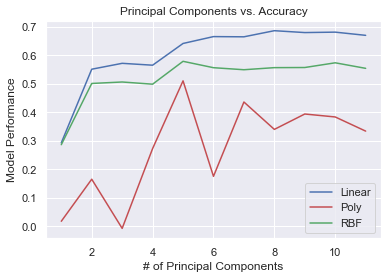

In [150]:
plt.plot(k, Accuracy_lin, 'b', label="Linear")
plt.plot(k, Accuracy_poly, 'r', label="Poly")
plt.plot(k, Accuracy_rbf, 'g', label="RBF")
plt.xlabel("# of Principal Components")
plt.ylabel("Model Performance")
plt.title("Principal Components vs. Accuracy")
plt.legend()
plt.show()